In [1]:
import os
import pandas as pd

In [2]:
def list_files_in_directory(directory_path):
    files_path = []
    try:
        with os.scandir(directory_path) as entries:
            for entry in entries:
                if entry.is_file():
                    files_path.append(entry.path)
        return files_path
    except FileNotFoundError:
        print(f"The directory '{directory_path}' does not exist")
    except PermissionError:
        print(f"Permission denied to access the directory '{directory_path}'")
    except Exception as e:
        print(f"An error occurred: {e}")

list_files_in_directory('./data')

['./data/sensor_data_19.csv',
 './data/sensor_data_12.csv',
 './data/sensor_data_10.csv',
 './data/sensor_data_5.csv',
 './data/sensor_data_11.csv',
 './data/sensor_data_4.csv',
 './data/sensor_data_9.csv',
 './data/sensor_data_7.csv',
 './data/sensor_data_6.csv',
 './data/sensor_data_14.csv',
 './data/sensor_data_13.csv',
 './data/sensor_data_17.csv',
 './data/sensor_data_3.csv',
 './data/sensor_data_1.csv',
 './data/sensor_data_8.csv',
 './data/sensor_data_16.csv',
 './data/sensor_data_2.csv',
 './data/sensor_data_15.csv',
 './data/sensor_data_18.csv',
 './data/sensor_data_no_fire.csv']

In [31]:
df = pd.read_csv('./data/sensor_data_1.csv', index_col=0)
df['burned'] = df['temperature'] > 55
df['humidity_warning'] = df['humidity'] < 30
df['temperature_warning'] = df['temperature'] > 30

In [27]:
steps_id = df.step.unique()
devices_id = df.id.unique()

# warning started

In [32]:
for device in devices_id:
    has_humidity_warning = df.loc[df['id']==device]['humidity_warning'].any()
    if not has_humidity_warning:
        continue
    still_no_warning = False
    for step in steps_id:
        if still_no_warning:
            df.loc[(df['id']==device)&(df['step']==step), 'humidity_warning'] = still_no_warning
        still_no_warning = df.loc[(df['id']==device)&(df['step']==step), 'humidity_warning'].values[0]

for device in devices_id:
    has_temperature_warning = df.loc[df['id']==device]['temperature_warning'].any()
    if not has_temperature_warning:
        continue
    still_no_warning = False
    for step in steps_id:
        if still_no_warning:
            df.loc[(df['id']==device)&(df['step']==step), 'temperature_warning'] = still_no_warning
        still_no_warning = df.loc[(df['id']==device)&(df['step']==step), 'temperature_warning'].values[0]

# burn count through time

In [38]:
for device in devices_id:
    has_burned = df.loc[df['id']==device]['burned'].any()
    if not has_burned:
        continue
    still_burned = False
    for step in steps_id:
        if still_burned:
            df.loc[(df['id']==device)&(df['step']==step), 'burned'] = still_burned
        still_burned = df.loc[(df['id']==device)&(df['step']==step), 'burned'].values[0]

In [39]:
burn_values = df.groupby(by='step')['burned'].sum().values
humidity_warning_values = df.groupby(by='step')['humidity_warning'].sum().values
temperature_warning_values = df.groupby(by='step')['temperature_warning'].sum().values

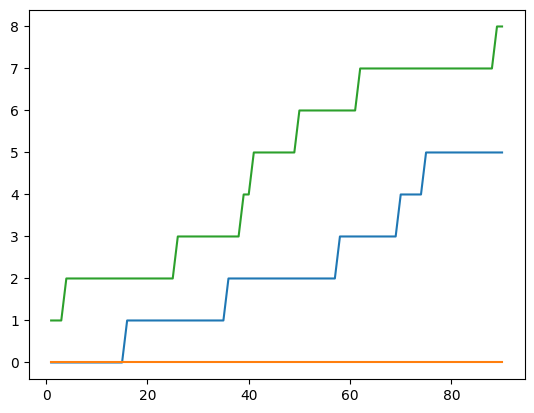

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x=steps_id,y=burn_values)
ax1 = sns.lineplot(x=steps_id,y=humidity_warning_values, ax=ax)
ax2 = sns.lineplot(x=steps_id,y=temperature_warning_values, ax=ax1)
plt.show()